                                        Prepared by: Sarit Maitra

In [1]:
!pip install pyforest
from pyforest import *
import datetime, pickle, copy, warnings
from pandas import DataFrame, merge, concat
import glob
plt.style.use('dark_background')

<IPython.core.display.Javascript object>

## 1.1 Data ingestion:
### 1.1.1 E-mini S&P 500 Futures (ES) data:

In [2]:
path = r'D:\Users\Desktop\Al\ES' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

d1 = pd.concat(li, axis=0, ignore_index=True)
d1.rename(columns = {'close': 'es'}, inplace = True)
d1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,timestamp,open,high,low,es,num_contracts_G,count_G,num_contracts_P,count_P
0,2020-05-01 00:00:00,2874.500,2877.125,2874.000,2877.125,295.0,134.0,164.0,73.0
1,2020-05-01 00:01:00,2877.250,2877.625,2875.125,2875.375,317.0,122.0,281.0,131.0
2,2020-05-01 00:02:00,2875.375,2875.375,2873.375,2874.625,104.0,59.0,137.0,64.0
3,2020-05-01 00:03:00,2874.625,2875.125,2874.125,2874.125,85.0,46.0,120.0,58.0
4,2020-05-01 00:04:00,2874.125,2875.375,2873.125,2875.250,148.0,65.0,108.0,51.0
...,...,...,...,...,...,...,...,...,...
29340,2020-05-29 20:56:00,3027.000,3027.250,3027.000,3027.250,98.0,30.0,135.0,50.0
29341,2020-05-29 20:57:00,3027.250,3027.250,3027.000,3027.250,82.0,25.0,119.0,33.0
29342,2020-05-29 20:58:00,3027.250,3027.375,3027.125,3027.250,157.0,42.0,135.0,39.0
29343,2020-05-29 20:59:00,3027.250,3027.500,3027.250,3027.250,210.0,92.0,478.0,68.0


In [3]:
#d1 = d1.set_index('timestamp')
d1 = d1[['timestamp', 'es']]
print(d1); print();
print('*********************')
# missing data
print('Missing data:')
print(d1.isnull().sum())

                 timestamp        es
0      2020-05-01 00:00:00  2877.125
1      2020-05-01 00:01:00  2875.375
2      2020-05-01 00:02:00  2874.625
3      2020-05-01 00:03:00  2874.125
4      2020-05-01 00:04:00  2875.250
...                    ...       ...
29340  2020-05-29 20:56:00  3027.250
29341  2020-05-29 20:57:00  3027.250
29342  2020-05-29 20:58:00  3027.250
29343  2020-05-29 20:59:00  3027.250
29344  2020-05-29 21:00:00  3027.250

[29345 rows x 2 columns]

*********************
Missing data:
timestamp       0
es           1365
dtype: int64


### 1.1.2 EURUSD data

In [4]:
path = r'D:\Users\Desktop\Al\EURUSD' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

d2 = pd.concat(li, axis=0, ignore_index=True)
d2.rename(columns = {'close': 'eurusd'}, inplace = True)
d2

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,timestamp,open,high,low,eurusd,amount_G,count_G,amount_P,count_P
0,2020-05-01 00:00:00,1094415.0,1094485.0,1094315.0,1094465.0,NaN,NaN,NaN,NaN
1,2020-05-01 00:01:00,1094485.0,1094535.0,1094190.0,1094215.0,1.0,1.0,NaN,NaN
2,2020-05-01 00:02:00,1094235.0,1094290.0,1094115.0,1094165.0,0.0,0.0,NaN,NaN
3,2020-05-01 00:03:00,1094140.0,1094165.0,1094065.0,1094115.0,0.0,0.0,NaN,NaN
4,2020-05-01 00:04:00,1094160.0,1094265.0,1094160.0,1094190.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
29340,2020-05-29 20:56:00,1110645.0,1116390.0,1110380.0,1111740.0,NaN,NaN,1.0,1.0
29341,2020-05-29 20:57:00,1111750.0,1116400.0,1111750.0,1111750.0,NaN,NaN,NaN,NaN
29342,2020-05-29 20:58:00,1111650.0,1111650.0,1111650.0,1111650.0,NaN,NaN,NaN,NaN
29343,2020-05-29 20:59:00,1111250.0,1116400.0,1111250.0,1113400.0,NaN,NaN,NaN,NaN


In [5]:
#d2 = d2.set_index('timestamp')
d2 = d2[['timestamp', 'eurusd']]
print(d2); print();
print('*********************')
# missing data
print('Missing data:')
d2.isnull().sum()

                 timestamp     eurusd
0      2020-05-01 00:00:00  1094465.0
1      2020-05-01 00:01:00  1094215.0
2      2020-05-01 00:02:00  1094165.0
3      2020-05-01 00:03:00  1094115.0
4      2020-05-01 00:04:00  1094190.0
...                    ...        ...
29340  2020-05-29 20:56:00  1111740.0
29341  2020-05-29 20:57:00  1111750.0
29342  2020-05-29 20:58:00  1111650.0
29343  2020-05-29 20:59:00  1113400.0
29344  2020-05-29 21:00:00        NaN

[29345 rows x 2 columns]

*********************
Missing data:


timestamp       0
eurusd       1249
dtype: int64

### 1.1.3 GBPUSD data

In [6]:
path = r'D:\Users\Desktop\Al\GBPUSD' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

d3 = pd.concat(li, axis=0, ignore_index=True)
d3.rename(columns = {'close': 'gbpusd'}, inplace = True)
d3

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,timestamp,open,high,low,gbpusd,amount_G,count_G,amount_P,count_P
0,2020-05-01 00:00:00,1258070.0,1258205.0,1257990.0,1258140.0,NaN,NaN,NaN,NaN
1,2020-05-01 00:01:00,1258090.0,1258235.0,1257840.0,1257935.0,NaN,NaN,2.0,2.0
2,2020-05-01 00:02:00,1257915.0,1257915.0,1257735.0,1257765.0,NaN,NaN,0.0,0.0
3,2020-05-01 00:03:00,1257735.0,1257765.0,1257515.0,1257565.0,NaN,NaN,0.0,0.0
4,2020-05-01 00:04:00,1257580.0,1257835.0,1257530.0,1257535.0,1.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...
29340,2020-05-29 20:56:00,1235010.0,1235400.0,1234550.0,1235400.0,NaN,NaN,NaN,NaN
29341,2020-05-29 20:57:00,1235450.0,1235450.0,1235450.0,1235450.0,NaN,NaN,NaN,NaN
29342,2020-05-29 20:58:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29343,2020-05-29 20:59:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#d3 = d3.set_index('timestamp')
d3 = d3[['timestamp', 'gbpusd']]
print(d3); print();
print('*********************')
# missing data
print('Missing data:')
d3.isnull().sum()

                 timestamp     gbpusd
0      2020-05-01 00:00:00  1258140.0
1      2020-05-01 00:01:00  1257935.0
2      2020-05-01 00:02:00  1257765.0
3      2020-05-01 00:03:00  1257565.0
4      2020-05-01 00:04:00  1257535.0
...                    ...        ...
29340  2020-05-29 20:56:00  1235400.0
29341  2020-05-29 20:57:00  1235450.0
29342  2020-05-29 20:58:00        NaN
29343  2020-05-29 20:59:00        NaN
29344  2020-05-29 21:00:00  1237150.0

[29345 rows x 2 columns]

*********************
Missing data:


timestamp       0
gbpusd       1450
dtype: int64

### 1.1.4 Gold (GC) data

In [8]:
path = r'D:\Users\Desktop\Al\GC' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

d4 = pd.concat(li, axis=0, ignore_index=True)
d4.rename(columns = {'close': 'gc'}, inplace = True)
d4

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,timestamp,open,high,low,gc,num_contracts_G,count_G,num_contracts_P,count_P
0,2020-05-01 00:00:00,1695.80,1695.90,1693.50,1695.85,26.0,24.0,19.0,14.0
1,2020-05-01 00:01:00,1695.85,1696.50,1695.35,1695.60,29.0,21.0,62.0,41.0
2,2020-05-01 00:02:00,1695.65,1695.90,1695.25,1695.65,7.0,3.0,12.0,10.0
3,2020-05-01 00:03:00,1695.70,1695.75,1695.25,1695.40,2.0,2.0,13.0,11.0
4,2020-05-01 00:04:00,1695.35,1695.45,1694.75,1694.85,17.0,16.0,8.0,8.0
...,...,...,...,...,...,...,...,...,...
29339,2020-05-29 20:56:00,1731.55,1731.65,1731.50,1731.50,NaN,NaN,NaN,NaN
29340,2020-05-29 20:57:00,1731.50,1731.50,1731.20,1731.20,NaN,NaN,NaN,NaN
29341,2020-05-29 20:58:00,1731.20,1731.50,1731.05,1731.45,NaN,NaN,NaN,NaN
29342,2020-05-29 20:59:00,1731.50,1731.60,1731.30,1731.30,NaN,NaN,NaN,NaN


In [9]:
#d4 = d4.set_index('timestamp')
d4 = d4[['timestamp', 'gc']]
print(d4); print();
print('*********************')
# missing data
print('Missing data:')
d4.isnull().sum()

                 timestamp       gc
0      2020-05-01 00:00:00  1695.85
1      2020-05-01 00:01:00  1695.60
2      2020-05-01 00:02:00  1695.65
3      2020-05-01 00:03:00  1695.40
4      2020-05-01 00:04:00  1694.85
...                    ...      ...
29339  2020-05-29 20:56:00  1731.50
29340  2020-05-29 20:57:00  1731.20
29341  2020-05-29 20:58:00  1731.45
29342  2020-05-29 20:59:00  1731.30
29343  2020-05-29 21:00:00  1731.35

[29344 rows x 2 columns]

*********************
Missing data:


timestamp     0
gc           15
dtype: int64

### 1.1.5 E-Mini Nasdaq 100 (NQ) data

In [10]:
path = r'D:\Users\Desktop\Al\NQ' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

d5 = pd.concat(li, axis=0, ignore_index=True)
d5.rename(columns = {'close': 'nq'}, inplace = True)
d5

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,timestamp,open,high,low,nq,num_contracts_G,count_G,num_contracts_P,count_P
0,2020-05-01 00:00:00,8838.500,8846.125,8838.125,8846.125,109.0,90.0,92.0,79.0
1,2020-05-01 00:01:00,8846.250,8847.375,8840.250,8841.250,59.0,51.0,95.0,71.0
2,2020-05-01 00:02:00,8841.125,8841.375,8835.875,8837.750,29.0,28.0,29.0,28.0
3,2020-05-01 00:03:00,8837.875,8839.625,8836.000,8836.750,26.0,25.0,27.0,20.0
4,2020-05-01 00:04:00,8836.625,8841.375,8834.250,8841.125,32.0,29.0,25.0,22.0
...,...,...,...,...,...,...,...,...,...
29340,2020-05-29 20:56:00,9587.875,9589.125,9587.875,9588.625,12.0,8.0,18.0,17.0
29341,2020-05-29 20:57:00,9588.625,9589.500,9587.875,9588.500,11.0,5.0,8.0,8.0
29342,2020-05-29 20:58:00,9588.500,9589.375,9588.250,9588.625,15.0,12.0,14.0,13.0
29343,2020-05-29 20:59:00,9588.625,9589.375,9587.000,9587.375,58.0,32.0,42.0,21.0


In [11]:
# d5 = d5.set_index('timestamp')
d5 = d5[['timestamp', 'nq']]
print(d5); print();
print('*********************')
# missing data
print('Missing data:')
d5.isnull().sum()

                 timestamp        nq
0      2020-05-01 00:00:00  8846.125
1      2020-05-01 00:01:00  8841.250
2      2020-05-01 00:02:00  8837.750
3      2020-05-01 00:03:00  8836.750
4      2020-05-01 00:04:00  8841.125
...                    ...       ...
29340  2020-05-29 20:56:00  9588.625
29341  2020-05-29 20:57:00  9588.500
29342  2020-05-29 20:58:00  9588.625
29343  2020-05-29 20:59:00  9587.375
29344  2020-05-29 21:00:00  9591.125

[29345 rows x 2 columns]

*********************
Missing data:


timestamp       0
nq           1568
dtype: int64

### 1.1.6 USDJPY data

In [12]:
path = r'D:\Users\Desktop\Al\USDJPY' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

d6 = concat(li, axis=0, ignore_index=True)
d6.rename(columns = {'close': 'usdjpy'}, inplace = True)
d6

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,timestamp,open,high,low,usdjpy,amount_G,count_G,amount_P,count_P
0,2020-05-01 00:00:00,107278500.0,107308000.0,107276500.0,107301000.0,3.0,3.0,NaN,NaN
1,2020-05-01 00:01:00,107300500.0,107371000.0,107300500.0,107368000.0,18.0,18.0,2.0,2.0
2,2020-05-01 00:02:00,107370000.0,107396000.0,107358500.0,107376500.0,11.0,11.0,4.0,4.0
3,2020-05-01 00:03:00,107378500.0,107403000.0,107372000.0,107381500.0,20.0,20.0,7.0,7.0
4,2020-05-01 00:04:00,107380000.0,107387500.0,107359500.0,107376500.0,2.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
29336,2020-05-29 20:56:00,107768500.0,107809000.0,106807500.0,107675000.0,NaN,NaN,NaN,NaN
29337,2020-05-29 20:57:00,107830000.0,107830000.0,107830000.0,107830000.0,NaN,NaN,NaN,NaN
29338,2020-05-29 20:58:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29339,2020-05-29 20:59:00,107835000.0,107835000.0,107835000.0,107835000.0,NaN,NaN,NaN,NaN


In [13]:
# saving final data set
d6.to_csv("USDJPY.csv")

In [14]:
# d6 = d6.set_index('timestamp')
d6 = d6[['timestamp', 'usdjpy']]
print(d6); print();
print('*********************')
# missing data
print('Missing data:')
d6.isnull().sum()

                 timestamp       usdjpy
0      2020-05-01 00:00:00  107301000.0
1      2020-05-01 00:01:00  107368000.0
2      2020-05-01 00:02:00  107376500.0
3      2020-05-01 00:03:00  107381500.0
4      2020-05-01 00:04:00  107376500.0
...                    ...          ...
29336  2020-05-29 20:56:00  107675000.0
29337  2020-05-29 20:57:00  107830000.0
29338  2020-05-29 20:58:00          NaN
29339  2020-05-29 20:59:00  107835000.0
29340  2020-05-29 21:00:00          NaN

[29341 rows x 2 columns]

*********************
Missing data:


timestamp       0
usdjpy       1077
dtype: int64

In [15]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29345 entries, 0 to 29344
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  29345 non-null  object 
 1   es         27980 non-null  float64
dtypes: float64(1), object(1)
memory usage: 458.6+ KB


## 2.1 Full Outer Join
- FULL OUTER JOIN combines the results of both the left and the right outer joins. 
- Joined DataFrame will contain all records from both the DataFrames and fill in NaNs for missing matches on either side. 

In [16]:
df1 = merge(d1, d2, on='timestamp', how='outer')
df2 = pd.merge(df1, d3, on='timestamp', how='outer')
df3 = pd.merge(df2, d4, on='timestamp', how='outer')
df4 = pd.merge(df3, d5, on='timestamp', how='outer')
df = pd.merge(df4, d6, on='timestamp', how='outer')
df

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,timestamp,es,eurusd,gbpusd,gc,nq,usdjpy
0,2020-05-01 00:00:00,2877.125,1094465.0,1258140.0,1695.85,8846.125,107301000.0
1,2020-05-01 00:01:00,2875.375,1094215.0,1257935.0,1695.60,8841.250,107368000.0
2,2020-05-01 00:02:00,2874.625,1094165.0,1257765.0,1695.65,8837.750,107376500.0
3,2020-05-01 00:03:00,2874.125,1094115.0,1257565.0,1695.40,8836.750,107381500.0
4,2020-05-01 00:04:00,2875.250,1094190.0,1257535.0,1694.85,8841.125,107376500.0
...,...,...,...,...,...,...,...
29340,2020-05-29 20:56:00,3027.250,1111740.0,1235400.0,1731.50,9588.625,107675000.0
29341,2020-05-29 20:57:00,3027.250,1111750.0,1235450.0,1731.20,9588.500,107830000.0
29342,2020-05-29 20:58:00,3027.250,1111650.0,NaN,1731.45,9588.625,NaN
29343,2020-05-29 20:59:00,3027.250,1113400.0,NaN,1731.30,9587.375,107835000.0


In [17]:
df.isnull().sum()

timestamp       0
es           1365
eurusd       1249
gbpusd       1450
gc             16
nq           1568
usdjpy       1081
dtype: int64

In [18]:
# Filling missing values using forward and backward fill 
df = df.fillna(method='ffill').fillna(method='bfill')
print(df.isna().sum())

timestamp    0
es           0
eurusd       0
gbpusd       0
gc           0
nq           0
usdjpy       0
dtype: int64


In [19]:
df

,timestamp,es,eurusd,gbpusd,gc,nq,usdjpy
0,2020-05-01 00:00:00,2877.125,1094465.0,1258140.0,1695.85,8846.125,107301000.0
1,2020-05-01 00:01:00,2875.375,1094215.0,1257935.0,1695.60,8841.250,107368000.0
2,2020-05-01 00:02:00,2874.625,1094165.0,1257765.0,1695.65,8837.750,107376500.0
3,2020-05-01 00:03:00,2874.125,1094115.0,1257565.0,1695.40,8836.750,107381500.0
4,2020-05-01 00:04:00,2875.250,1094190.0,1257535.0,1694.85,8841.125,107376500.0
...,...,...,...,...,...,...,...
29340,2020-05-29 20:56:00,3027.250,1111740.0,1235400.0,1731.50,9588.625,107675000.0
29341,2020-05-29 20:57:00,3027.250,1111750.0,1235450.0,1731.20,9588.500,107830000.0
29342,2020-05-29 20:58:00,3027.250,1111650.0,1235450.0,1731.45,9588.625,107830000.0
29343,2020-05-29 20:59:00,3027.250,1113400.0,1235450.0,1731.30,9587.375,107835000.0


In [20]:
# saving final data set
df.to_csv("AL_final_data.csv")

In [21]:
pd.options.display.float_format = "{:.2f}".format
df.describe()

<IPython.core.display.Javascript object>

,es,eurusd,gbpusd,gc,nq,usdjpy
count,29345.00,29345.00,29345.00,29345.00,29345.00,29345.00
mean,2915.07,1090105.98,1229981.59,1721.17,9207.19,107209891.12
std,70.37,8343.41,10285.19,19.11,241.11,505815.85
min,2761.62,1076660.00,1208510.00,1676.50,8563.75,103750000.00
25%,2853.88,1082605.00,1221710.00,1706.55,9016.50,106833500.00
50%,2916.88,1089900.00,1228400.00,1720.00,9265.12,107312000.00
75%,2963.38,1095825.00,1236420.00,1734.75,9410.00,107647000.00
max,3064.38,1114440.00,1258140.00,1774.85,9601.88,112017500.00


In [22]:
df = df.set_index('timestamp') # setting index as datetime
df.index = pd.to_datetime(df.index)
df.info()

<IPython.core.display.Javascript object>

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29345 entries, 2020-05-01 00:00:00 to 2020-05-29 21:00:00
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   es      29345 non-null  float64
 1   eurusd  29345 non-null  float64
 2   gbpusd  29345 non-null  float64
 3   gc      29345 non-null  float64
 4   nq      29345 non-null  float64
 5   usdjpy  29345 non-null  float64
dtypes: float64(6)
memory usage: 1.6 MB


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

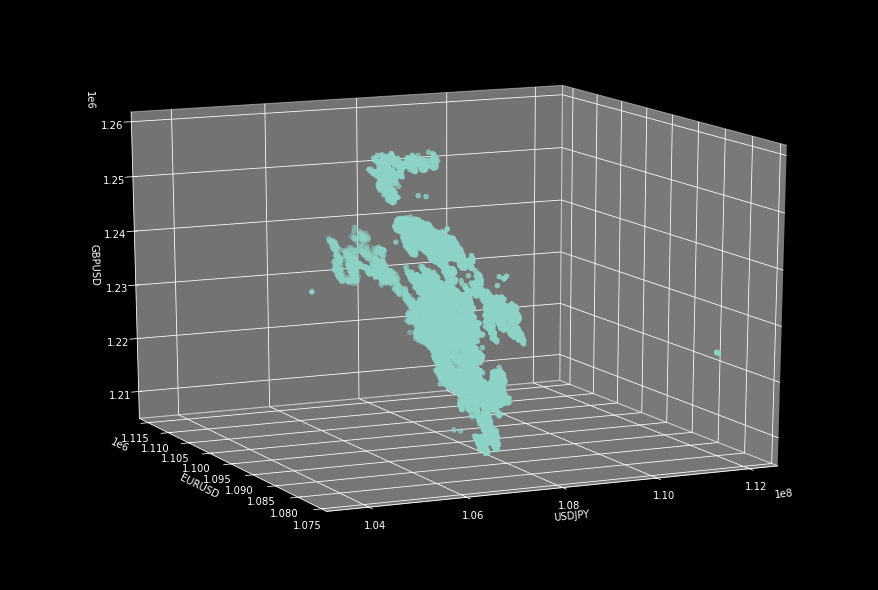

In [23]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)
ax.scatter(df["usdjpy"], df["eurusd"], df["gbpusd"])
ax.set_xlabel("USDJPY")
ax.set_ylabel("EURUSD")
ax.set_zlabel("GBPUSD")
plt.show()

<IPython.core.display.Javascript object>

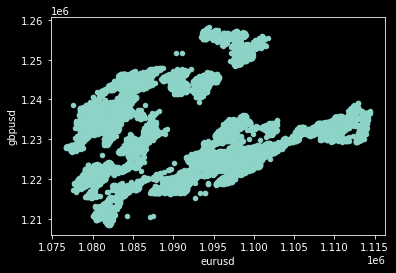

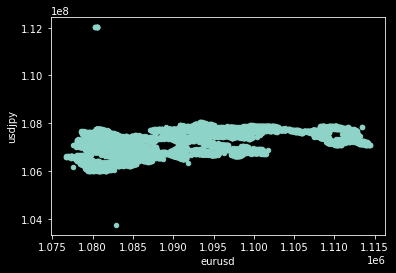

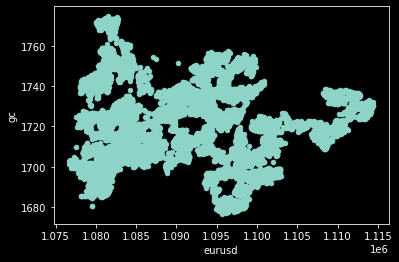

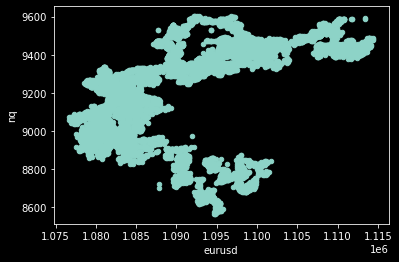

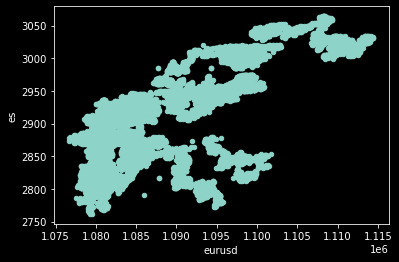

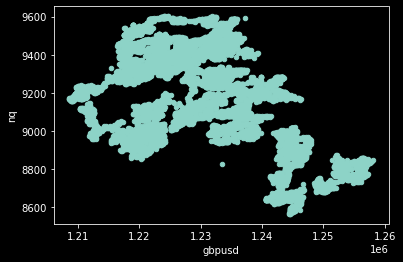

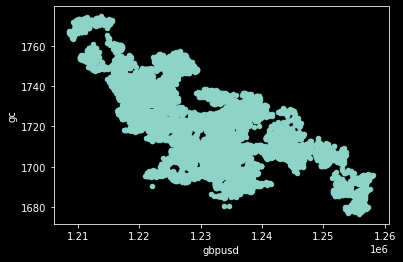

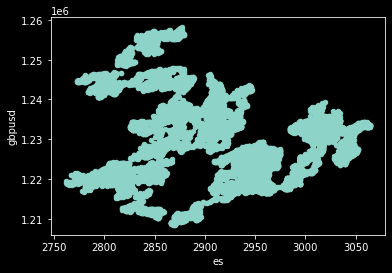

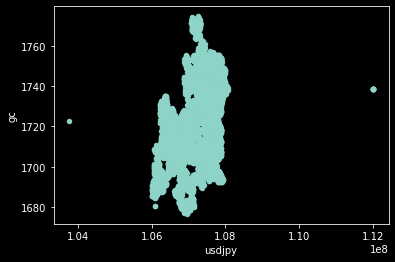

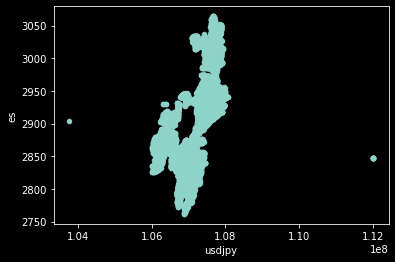

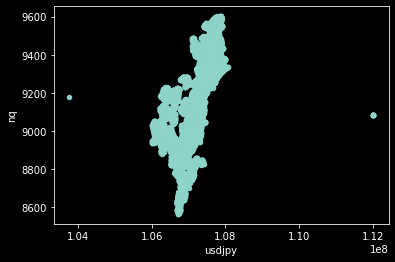

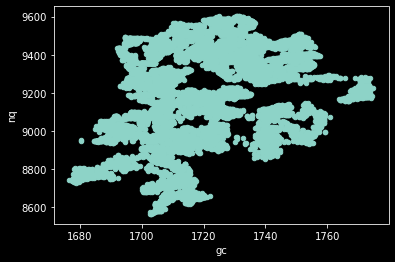

In [24]:
# scatter plots
df.plot(kind='scatter', x = 'eurusd', y = 'gbpusd'); 
df.plot(kind= 'scatter', x = 'eurusd', y = 'usdjpy')
df.plot(kind= 'scatter', x = 'eurusd', y = 'gc')
df.plot(kind='scatter', x= 'eurusd', y = 'nq')
df.plot(kind= 'scatter', x = 'eurusd', y = 'es')
df.plot(kind='scatter', x= 'gbpusd', y = 'nq')
df.plot(kind= 'scatter', x = 'gbpusd', y = 'gc')
df.plot(kind='scatter', x= 'es', y = 'gbpusd')
df.plot(kind= 'scatter', x = 'usdjpy', y = 'gc')
df.plot(kind='scatter', x= 'usdjpy', y = 'es')
df.plot(kind= 'scatter', x = 'usdjpy', y = 'nq')
df.plot(kind ='scatter', x = 'gc', y = 'nq')
plt.show()

# Time -series analysis

The VAR class assumes that the passed time series are stationary. Here transformed non-stationary or trending data by first-differencing to be stationary. 

For direct analysis of non-stationary time series, a standard stable VAR(p) model is not appropriate.

In [25]:
import statsmodels.tsa.api as smt
import pickle

In [26]:
#data = df[['eur_usd', 'gbp_usd','usd_jpy', 'gc', 'nq', 'es']]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

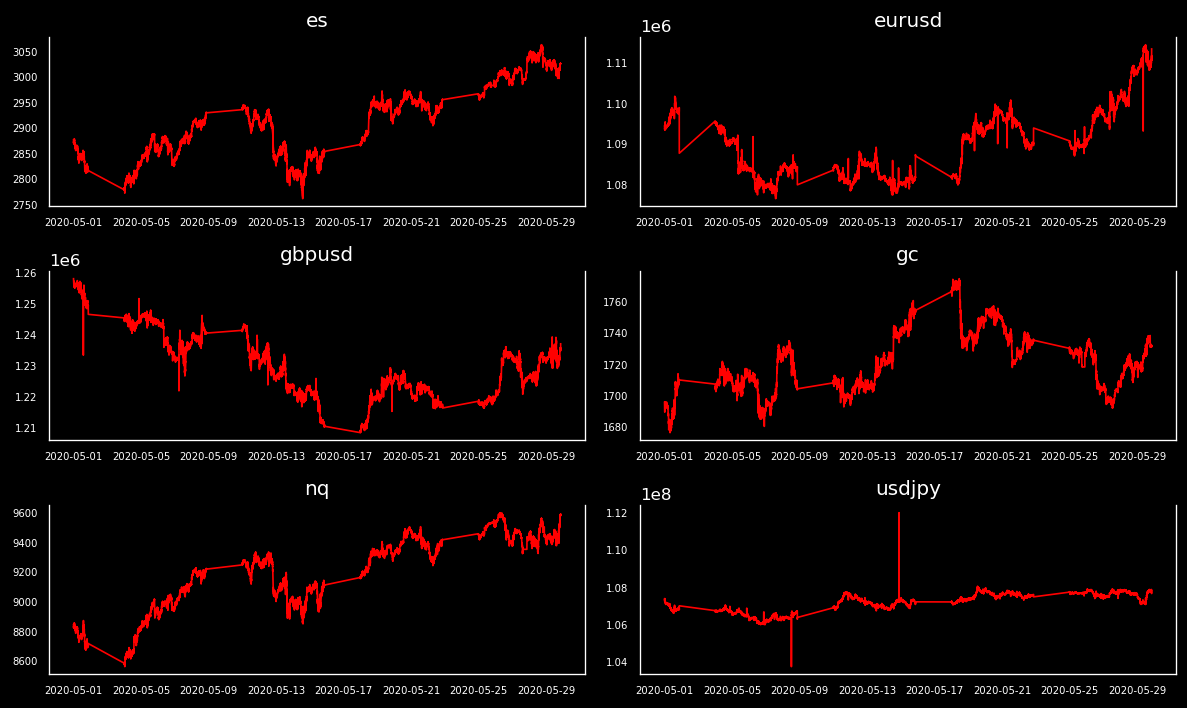

In [27]:
# Plot
plt.style.use('dark_background')
fig, axes = plt.subplots(nrows=3, ncols=2, dpi=120, figsize=(10,6))

for i, ax in enumerate(axes.flatten()):
    dataset = df[df.columns[i]]
    ax.plot(dataset, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines['top'].set_alpha(0)
    ax.tick_params(labelsize=6)
    plt.tight_layout();

In [28]:
df.dtypes # checking data types

es        float64
eurusd    float64
gbpusd    float64
gc        float64
nq        float64
usdjpy    float64
dtype: object

## Stationarity check:
The outcome of unit root testing matters for the empirical model to be estimated. Stationarity means here that the mean, variance and intertemporal correlation structure remains constant over time. Non-stationarities here from the stochastic properties of the process.
### ADF Test:

In [29]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")
        
# ADF Test on each column
for name, column in df.iteritems():
    adfuller_test(column, name=column.name)
    print()

    Augmented Dickey-Fuller Test on "es" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.9751
 No. Lags Chosen       = 30
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.7622. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.

    Augmented Dickey-Fuller Test on "eurusd" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.1314
 No. Lags Chosen       = 8
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.9462. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.

    Augmented Dickey-Fuller Test on "gbpusd" 
    -----------------------------------------------
 Null Hypothesis: Data has unit r

The null hypothesis of the ADF test states that the time series is not stationary. With a p-value of > 0.05 (the test statistic larger than the critical value for the selected confidence level), we have no reason to reject the null hypothesis,
meaning that we can conclude that the series is not stationary.

To extract maximum information from our data, it is important to have a normal or Gaussian distribution of the data. To check for that, we have done a normality test based on the Null and Alternate Hypothesis intuition.
### KPSS Test:

In [30]:
from statsmodels.tsa.stattools import kpss
def kpss_test(x, h0_type='c'):
    indices = ['Test Statistic', 'p-value', '# of Lags']
    kpss_test = kpss(x, regression=h0_type, nlags ='auto')
    results = pd.Series(kpss_test[0:3], index=indices)
    for key, value in kpss_test[3].items():
        results[f'Critical Value ({key})'] = value
        return results

print('KPSS-EURUSD:')
print(kpss_test(df.eurusd))
print('___________________')
print('KPSS-GBPUSD:')
print(kpss_test(df.gbpusd))
print('___________________')
print('KPSS-USDJPY:')
print(kpss_test(df.usdjpy))
print('___________________')
print('KPSS-GC:')
print(kpss_test(df.gc))
print('___________________')
print('KPSS-NQ:')
print(kpss_test(df.nq))
print('___________________')
print('KPSS-ES:')
print(kpss_test(df.es))


KPSS-EURUSD:


C:\Users\Sarit\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


<IPython.core.display.Javascript object>

Test Statistic         14.00
p-value                 0.01
# of Lags              99.00
Critical Value (10%)    0.35
dtype: float64
___________________
KPSS-GBPUSD:


C:\Users\Sarit\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


<IPython.core.display.Javascript object>

Test Statistic         15.15
p-value                 0.01
# of Lags              99.00
Critical Value (10%)    0.35
dtype: float64
___________________
KPSS-USDJPY:


C:\Users\Sarit\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


<IPython.core.display.Javascript object>

Test Statistic         20.32
p-value                 0.01
# of Lags              99.00
Critical Value (10%)    0.35
dtype: float64
___________________
KPSS-GC:


C:\Users\Sarit\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


<IPython.core.display.Javascript object>

Test Statistic          8.03
p-value                 0.01
# of Lags              99.00
Critical Value (10%)    0.35
dtype: float64
___________________
KPSS-NQ:


C:\Users\Sarit\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


<IPython.core.display.Javascript object>

Test Statistic         22.46
p-value                 0.01
# of Lags              99.00
Critical Value (10%)    0.35
dtype: float64
___________________
KPSS-ES:


C:\Users\Sarit\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


<IPython.core.display.Javascript object>

Test Statistic         20.72
p-value                 0.01
# of Lags              99.00
Critical Value (10%)    0.35
dtype: float64


The null hypothesis of the KPSS test is that the time series is stationary. With a pvalue of 0.01 (or test statistic greater than the selected critical value), we have reasons to reject the null hypothesis in favor of the alternative one, meaning that
the series is not stationary.
### Normality test:

In [31]:
from scipy import stats

stat,p = stats.normaltest(df.eurusd)
print('Statistics=%.3f, p=%.3f' % (stat,p))
alpha = 0.05
if p > alpha:
    print('EURUSD Data looks Gaussian (fail to reject H0)')
else:
    print('EURUSD Data do not look Gaussian (reject H0)')
print('______________')
stat,p = stats.normaltest(df.gbpusd)
print('Statistics=%.3f, p=%.3f' % (stat,p))
alpha = 0.05
if p > alpha:
    print('GBPUSD Data looks Gaussian (fail to reject H0)')
else:
    print('GBPUSD Data do not look Gaussian (reject H0)')
print('______________')
stat,p = stats.normaltest(df.usdjpy)
print('Statistics=%.3f, p=%.3f' % (stat,p))
alpha = 0.05
if p > alpha:
    print('USDJPY Data looks Gaussian (fail to reject H0)')
else:
    print('USDJPY Data do not look Gaussian (reject H0)')
print('______________')
stat,p = stats.normaltest(df.es)
print('Statistics=%.3f, p=%.3f' % (stat,p))
alpha = 0.05
if p > alpha:
    print('ES Data looks Gaussian (fail to reject H0)')
else:
    print('ES Data do not look Gaussian (reject H0)')
print('______________')
stat,p = stats.normaltest(df.nq)
print('Statistics=%.3f, p=%.3f' % (stat,p))
alpha = 0.05
if p > alpha:
    print('NQ Data looks Gaussian (fail to reject H0)')
else:
    print('NQ Data do not look Gaussian (reject H0)')
print('______________')
stat,p = stats.normaltest(df.gc)
print('Statistics=%.3f, p=%.3f' % (stat,p))
alpha = 0.05
if p > alpha:
    print('GC Data looks Gaussian (fail to reject H0)')
else:
    print('GC Data do not look Gaussian (reject H0)')
print('______________')

print('EURUSD: Kurtosis of normal distribution: {}'. format(stats.kurtosis(df.eurusd)))
print('EURUSD: Skewness of normal distribution: {}'. format(stats.skew(df.eurusd)))
print('************')
print('GBPUSD: Kurtosis of normal distribution: {}'. format(stats.kurtosis(df.gbpusd)))
print('GBPUSD: Skewness of normal distribution: {}'. format(stats.skew(df.gbpusd)))
print('************')
print('USDJPY: Kurtosis of normal distribution: {}'. format(stats.kurtosis(df.usdjpy)))
print('USDJPY: Skewness of normal distribution: {}'. format(stats.skew(df.usdjpy)))
print('************')
print('ES: Kurtosis of normal distribution: {}'. format(stats.kurtosis(df.es)))
print('ES: Skewness of normal distribution: {}'. format(stats.skew(df.es)))
print('************')
print('NQ: Kurtosis of normal distribution: {}'. format(stats.kurtosis(df.nq)))
print('NQ: Skewness of normal distribution: {}'. format(stats.skew(df.nq)))
print('************')
print('GC: Kurtosis of normal distribution: {}'. format(stats.kurtosis(df.gc)))
print('GC: Skewness of normal distribution: {}'. format(stats.skew(df.gc)))
print()

Statistics=1730.135, p=0.000
EURUSD Data do not look Gaussian (reject H0)
______________
Statistics=1213.219, p=0.000
GBPUSD Data do not look Gaussian (reject H0)
______________
Statistics=1714.579, p=0.000
USDJPY Data do not look Gaussian (reject H0)
______________
Statistics=6454.385, p=0.000
ES Data do not look Gaussian (reject H0)
______________
Statistics=2540.823, p=0.000
NQ Data do not look Gaussian (reject H0)
______________
Statistics=822.580, p=0.000
GC Data do not look Gaussian (reject H0)
______________
EURUSD: Kurtosis of normal distribution: -0.24795142380816637
EURUSD: Skewness of normal distribution: 0.6268226365879681
************
GBPUSD: Kurtosis of normal distribution: -0.3789097254009337
GBPUSD: Skewness of normal distribution: 0.4601503086221758
************
USDJPY: Kurtosis of normal distribution: 1.9488984116380061
USDJPY: Skewness of normal distribution: -0.28981427530311443
************
ES: Kurtosis of normal distribution: -0.990571444317438
ES: Skewness of nor

- This three distribution gives us some intuition about the normal distribution of our data. 
- A value close to 0 for Kurtosis indicates a Normal Distribution where asymmetrical nature is signified by a value between -0.5 and +0.5 for skewness. 
- The tails are heavier for kurtosis greater than 0 and vice versa. 
- Moderate skewness refers to the value between -1 and -0.5 or 0.5 and 1.
### Histogram and probability plots


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

count     29345.00
mean    1090105.98
std        8343.41
min     1076660.00
25%     1082605.00
50%     1089900.00
75%     1095825.00
max     1114440.00
Name: eurusd, dtype: float64

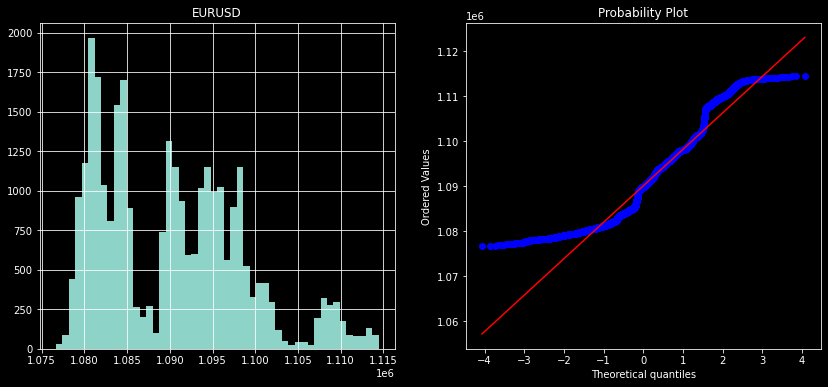

In [32]:
# visualization (EURUSD)
pd.options.display.float_format = "{:.2f}".format
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
df['eurusd'].hist(bins=50)
plt.title('EURUSD')
plt.subplot(1,2,2)
stats.probplot(df['eurusd'], plot=plt);
df['eurusd'].describe().T

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

count     29345.00
mean    1229981.59
std       10285.19
min     1208510.00
25%     1221710.00
50%     1228400.00
75%     1236420.00
max     1258140.00
Name: gbpusd, dtype: float64

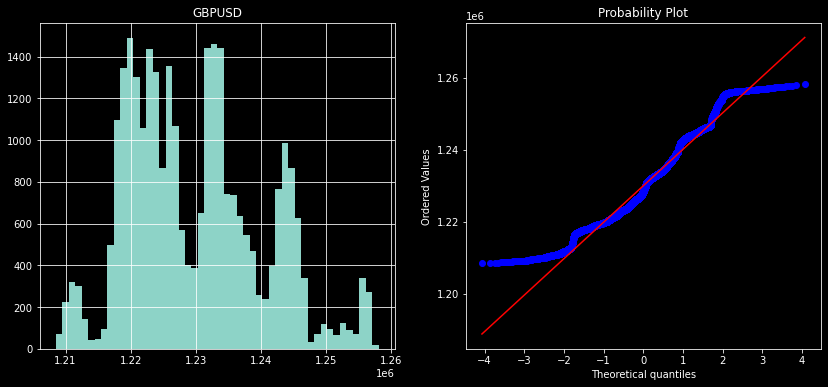

In [33]:
# visualization (GBPUSD)
pd.options.display.float_format = "{:.2f}".format
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
df['gbpusd'].hist(bins=50)
plt.title('GBPUSD')
plt.subplot(1,2,2)
stats.probplot(df['gbpusd'], plot=plt);
df['gbpusd'].describe().T

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

count       29345.00
mean    107209891.12
std        505815.85
min     103750000.00
25%     106833500.00
50%     107312000.00
75%     107647000.00
max     112017500.00
Name: usdjpy, dtype: float64

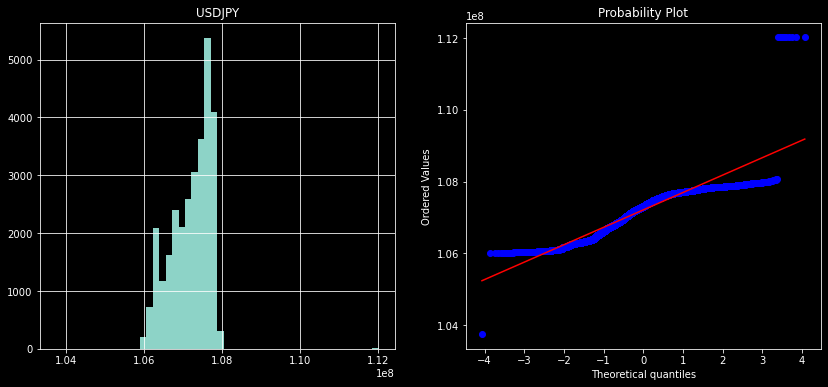

In [34]:
# visualization (USDJPY)
pd.options.display.float_format = "{:.2f}".format
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
df['usdjpy'].hist(bins=50)
plt.title('USDJPY')
plt.subplot(1,2,2)
stats.probplot(df['usdjpy'], plot=plt);
df['usdjpy'].describe().T

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

count   29345.00
mean     2915.07
std        70.37
min      2761.62
25%      2853.88
50%      2916.88
75%      2963.38
max      3064.38
Name: es, dtype: float64

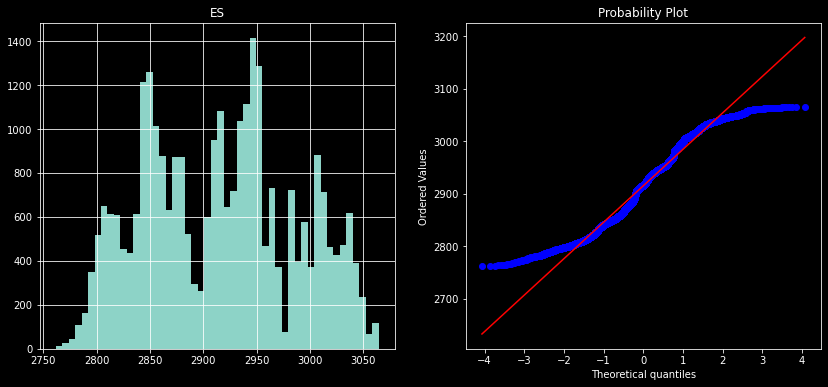

In [35]:
# visualization (ES)

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
df['es'].hist(bins=50)
plt.title('ES')
plt.subplot(1,2,2)
stats.probplot(df['es'], plot=plt);
df['es'].describe().T

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

count   29345.00
mean     1721.17
std        19.11
min      1676.50
25%      1706.55
50%      1720.00
75%      1734.75
max      1774.85
Name: gc, dtype: float64

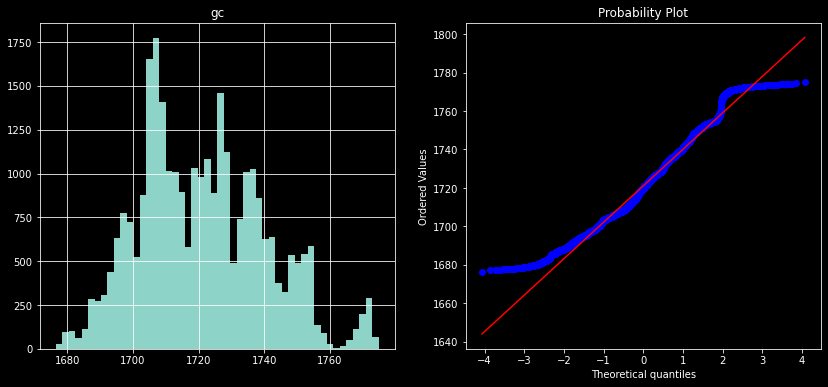

In [36]:
# visualization (GC)

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
df['gc'].hist(bins=50)
plt.title('gc')
plt.subplot(1,2,2)
stats.probplot(df['gc'], plot=plt);
df['gc'].describe().T

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

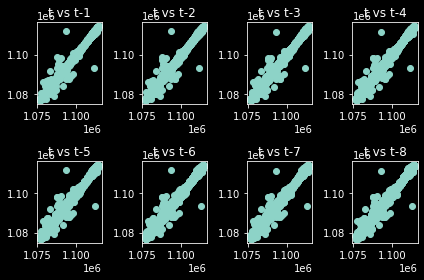

In [37]:
from pandas.plotting import lag_plot

values = DataFrame(df.eurusd.values)

lags = 8
columns = [values]
for i in range(1,(lags + 1)):
    columns.append(values.shift(i))
dt = concat(columns, axis=1)
columns = ['t']
for i in range(1,(lags + 1)):
    columns.append('t-' + str(i))
dt.columns = columns
plt.figure(1)
for i in range(1,(lags + 1)):
    ax = plt.subplot(240 + i)
    ax.set_title('t vs t-' + str(i))
    plt.scatter(x=dt['t'].values, y=dt['t-'+str(i)].values)
    
dt.index = df.index
plt.tight_layout()

### Correlation & Causation:
Though correlation helps us determine the degree of relationship between the variables, it does not tell us about the cause & effect of the relationship. A high degee of correlation does not always necessarily mean a relationship of cause & effect exists between varuables. 

Correlation does not imply causation, although the existence of causation always implies correlation.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

value > 0.5 is considerred correlated, > 0.8 is highly correlated


<IPython.core.display.Javascript object>

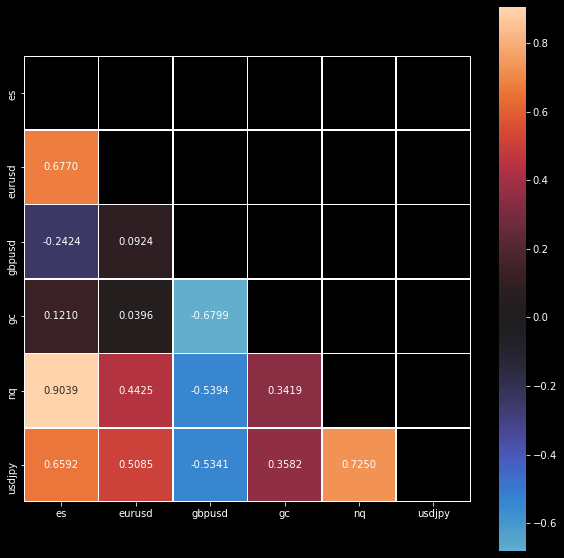

Correlation matrix:


,es,eurusd,gbpusd,gc,nq,usdjpy
es,1.00,0.68,-0.24,0.12,0.90,0.66
eurusd,0.68,1.00,0.09,0.04,0.44,0.51
gbpusd,-0.24,0.09,1.00,-0.68,-0.54,-0.53
gc,0.12,0.04,-0.68,1.00,0.34,0.36
nq,0.90,0.44,-0.54,0.34,1.00,0.72
usdjpy,0.66,0.51,-0.53,0.36,0.72,1.00


In [38]:
# Compute the correlation matrix
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt = '.4f', mask=mask, center=0, square=True, linewidths=.5)
print("value > 0.5 is considerred correlated, > 0.8 is highly correlated")
plt.show()

print('Correlation matrix:')
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

<IPython.core.display.Javascript object>

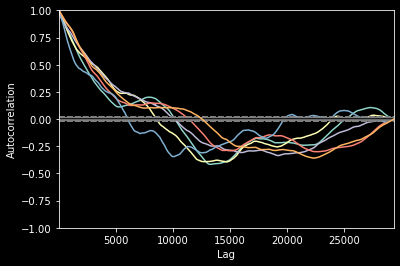

In [39]:
from pandas.plotting import autocorrelation_plot
# autocorrelation
autocorrelation_plot(df.eurusd)
autocorrelation_plot(df.gbpusd)
autocorrelation_plot(df.usdjpy)
autocorrelation_plot(df.es)
autocorrelation_plot(df.gc)
autocorrelation_plot(df.nq)
plt.show()

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29345 entries, 2020-05-01 00:00:00 to 2020-05-29 21:00:00
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   es      29345 non-null  float64
 1   eurusd  29345 non-null  float64
 2   gbpusd  29345 non-null  float64
 3   gc      29345 non-null  float64
 4   nq      29345 non-null  float64
 5   usdjpy  29345 non-null  float64
dtypes: float64(6)
memory usage: 1.6 MB


The plot provides the lag number along the x-axis and the correlation coeffcient value between -1 and 1 on the y-axis. The plot also includes solid and dashed lines that indicate the 95% and 99% confidence interval for the correlation values. Correlation values above these lines are more significant than those below the line, providing a threshold or cutoff for selecting more
relevant lag values.

# Vector Auto Regression (p) processes

We are interested in modeling a T * K multivariate time series Y, where T denotes the number of observations and K the number of variables. One way of estimating relationships between the time series and their lagged values is the vector autoregression process:

- Y_t = A_1 Y_{t-1} + ...... + A_p Y_{t-p} + u_t
- u_t ~ Normal(0, Sigma_u)

here A_i is a K * K coefficient matrix.

## Granger Casuality test

The basis behind Vector AutoRegression is that each of the time series in the system influences each other. This way, we can predict the series with past values of itself along with other series in the system. We will use Granger’s Causality Test to test this relationship before building the model.

- Null hypothesis (H0) = coefficients of past values in the regression equation is zero. 

In [41]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag = 8
test = 'ssr_chi2test'
def grangers_causation_matrix(d, variables, test='ssr_chi2test', verbose=False):
    
    """
    Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. 
    
    The values in the table are the P-Values. 
    
    P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.
    """
    df = DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(d[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

print(grangers_causation_matrix(df, variables = df.columns))

"""Conclusion: p-value < 0.05, to reject the null hypothesis; therefore H0 is rejected and alternate hypotheses (past values of time series (X) cause the other series (Y)) is accepted."""

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

          es_x  eurusd_x  gbpusd_x  gc_x  nq_x  usdjpy_x
es_y      1.00      0.00      0.01  0.01  0.02      0.00
eurusd_y  0.00      1.00      0.00  0.00  0.00      0.01
gbpusd_y  0.00      0.00      1.00  0.00  0.00      0.00
gc_y      0.01      0.01      0.00  1.00  0.01      0.00
nq_y      0.00      0.00      0.03  0.01  1.00      0.00
usdjpy_y  0.00      0.00      0.00  0.00  0.00      1.00


'Conclusion: p-value < 0.05, to reject the null hypothesis; therefore H0 is rejected and alternate hypotheses (past values of time series (X) cause the other series (Y)) is accepted.'

In [42]:
# spliting train/test
nobs = 120 # keeping 60 mins observations aside for validation
train_var, test_var = df[0:-nobs], df[-nobs:]

# Check size
print(train_var.shape); print(test_var.shape);

(29225, 6)
(120, 6)


The results show only modest evidence of lead-lag interactions between the series. Granger causality test can identify whether two variables move one after the other or contemporaneously and they test includes a VAR model and an F-test to jointly test for the significance of the lags on the explanatory variables.

Since we have estimated a tri-variate VAR, three panels are displayed, with one for each dependent variable in the system.

There is causality from EUR to GBP and from JPY to GBP that is significant at the 1% level.
We also find significant causality at the 5% level from EUR to JPY and GBP to JPY, but no causality from any of the currencies to EUR.

These results might be interpreted as suggesting that information is incorporated slightly more quickly in the pound-dollar rate and yen-dollar rates than into the euro-dollar rate.

## Correcting for stationarity in transformed-data:
A major criterion in time series analysis is that the series itself is stationary. Stationary means that the key statistical properties of a time series do not change over time. A time series must be stationaryThe first hypothesis, , tests for the presence of cointegration. It is clear that since the test statistic exceeds the 1% level significantly () that we have strong evidence to reject the null hypothesis of no cointegration. The second test for  against the alternative hypothesis of  also provides clear evidence to reject  since the test statistic exceeds the 1% level significantly. The final test for  against  also provides sufficient evidence for rejecting the null hypothesis that  and so can conclude that the rank of the matrix  is greater than 2.

Thus the best estimate of the rank of the matrix is , which tells us that we need a linear combination of three time series to form a stationary series. This is to be expected, by definition of the series, as the underlying random walk utilised for all three series is non-stationary.The first hypothesis, , tests for the presence of cointegration. It is clear that since the test statistic exceeds the 1% level significantly () that we have strong evidence to reject the null hypothesis of no cointegration. The second test for  against the alternative hypothesis of  also provides clear evidence to reject  since the test statistic exceeds the 1% level significantly. The final test for  against  also provides sufficient evidence for rejecting the null hypothesis that  and so can conclude that the rank of the matrix  is greater than 2.

Thus the best estimate of the rank of the matrix is , which tells us that we need a linear combination of three time series to form a stationary series. This is to be expected, by definition of the series, as the underlying random walk utilised for all three series is non-stationary., otherwise the model would not be able to forecast it accurately.
- Natural logarithm: Making the exponential trend closer to linear
- Differencing: Taking the difference between the current observation and a lagged value (observation x time points before it) transformed data:

In [43]:
sys.float_info.max
# log transformation will lead to system error
# Skipping log transformation

<IPython.core.display.Javascript object>

1.7976931348623157e+308

- First-order differencing in a time series will remove a linear trend (i.e., differences=1).
- Second-order differencing will remove a quadratic trend (i.e., differences=2).
- In addition, first-order differencing in a time series at a lag equal to the period will remove a seasonal trend.

In [44]:
# transfoming training data set

#train_log = np.log(train)
train_trans = train_var.diff().dropna() # differencing
print('Description of diff data:'); print(train_trans.describe());

Description of diff data:
            es    eurusd    gbpusd       gc       nq      usdjpy
count 29224.00  29224.00  29224.00 29224.00 29224.00    29224.00
mean      0.00      0.55     -0.86     0.00     0.02       16.19
std       1.12    289.07    335.11     0.52     3.71    48008.82
min     -37.75 -18615.00 -18420.00    -9.15  -131.50 -4778500.00
25%      -0.50    -50.00   -100.00    -0.20    -1.50    -5500.00
50%       0.00      0.00      0.00     0.00     0.00        0.00
75%       0.50     50.00    100.00     0.20     1.62     5500.00
max      26.88  18290.00  17970.00    11.95    84.75  4752500.00


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

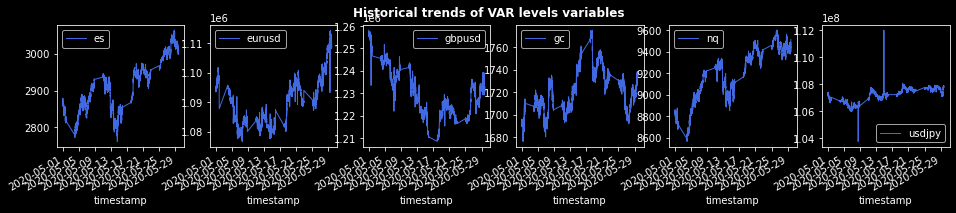

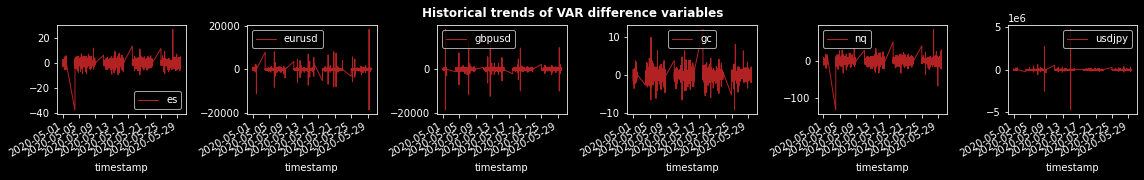

In [45]:
def plot_vars(train, levels, color, leveltype):
    
    """
    Displays historical trends of VAR variables
    And see if it's sensible to just select levels instead of differences
    """
    
    fig, ax = plt.subplots(1, 6, figsize=(16,2.5), sharex=True)
    #palettes = ["blue", "green", "red", "orange", "purple", "black"]
    for col, i in dict(zip(levels, list(range(6)))).items():
        train[col].plot(ax=ax[i], legend=True, linewidth=1.0, color=color, sharex=True)     
    
    #fig.set_facecolor("floralwhite")
    fig.suptitle(f"Historical trends of VAR {leveltype} variables", 
                 fontsize=12, fontweight="bold")
    
plot_vars(train_var, levels = train_var.columns, color="royalblue", leveltype="levels")
plot_vars(train_trans, levels = train_trans.columns, color="firebrick", leveltype="difference")
plt.tight_layout()

<IPython.core.display.Javascript object>

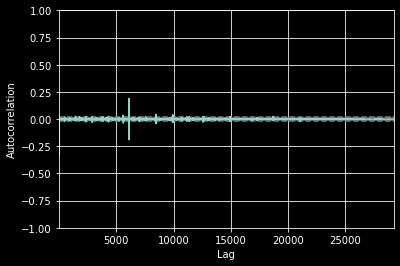

In [46]:
# line plot
autocorrelation_plot(train_trans)
plt.show()

we can see no significant relationship between the lagged observations, as we would expect from the way the random walk was generated. All correlations are small, close to zero and below the 95% and 99% confidence levels

In [47]:
print('Dicky-Fuller test on transformed data set:')
print('********************************************')

from statsmodels.tsa.stattools import adfuller

def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")
        
# ADF Test on each column
for name, column in train_trans.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

Dicky-Fuller test on transformed data set:
********************************************
    Augmented Dickey-Fuller Test on "es" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -29.9509
 No. Lags Chosen       = 29
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "eurusd" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -71.5917
 No. Lags Chosen       = 7
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "gbpusd" 
    ---------------------------------------

- Under this scenario, the series are assumed to be non-stationary but became stationary after first difference
- One special feature of this is that they are of the same order of integration.